<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/Figure3_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [24]:
fileDownloaded = drive.CreateFile({'id': '1ueVcD1_WExtvxjP4PIukKzNk1GL2_TD_'})
fileDownloaded.GetContentFile('nco_corpc0_0620163614.csv')

In [25]:
df = pd.read_csv('nco_corpc0_0620163614.csv',encoding = "cp932")
df.head()

,日経会社コード,企業名称,株式コード,決算期,決算種別,連結基準,<貸借対照表（資産）>現金・預金／現金及び現金同等物(百万円)[B022],<貸借対照表（資産）>棚卸資産(百万円)[B034],<貸借対照表（資産）>資産合計(百万円)[B110],<貸借対照表（資産）>固定資産／非流動資産(百万円)[B062]
0,5,宝幸,9999,1985/01,10,1,6545.0,12413.0,48088.0,12691.0
1,5,宝幸,9999,1986/01,10,1,5151.0,13936.0,48518.0,12840.0
2,5,宝幸,9999,1987/01,10,1,4622.0,13324.0,49672.0,13184.0
3,5,宝幸,9999,1988/01,10,1,5354.0,11972.0,54919.0,16435.0
4,5,宝幸,9999,1988/09,10,1,4179.0,13395.0,55581.0,12550.0


In [26]:
#df = df.drop(columns={'<貸借対照表（資産）>その他棚卸資産(百万円)'})
#df = df.drop(columns={'日経会社コード'})
#df = df.drop(columns={'決算種別'})
#df = df.drop(columns={'連結基準'})
#df = df.drop(columns={'<貸借対照表（資産）>有形固定資産(百万円)'})
#df = df.drop(columns={'<貸借対照表（資産）>償却対象有形固定資産(百万円)'})

In [27]:
df = df.rename(columns={'<貸借対照表（資産）>現金・預金／現金及び現金同等物(百万円)[B022]':'Cash'}) 
df = df.rename(columns={'<貸借対照表（資産）>棚卸資産(百万円)[B034]':'Inventory'})
df = df.rename(columns={'<貸借対照表（資産）>資産合計(百万円)[B110]':'Assets'})
df = df.rename(columns={'<貸借対照表（資産）>固定資産／非流動資産(百万円)[B062]':'Fixed Assets'})

In [28]:
df.head()

,日経会社コード,企業名称,株式コード,決算期,決算種別,連結基準,Cash,Inventory,Assets,Fixed Assets
0,5,宝幸,9999,1985/01,10,1,6545.0,12413.0,48088.0,12691.0
1,5,宝幸,9999,1986/01,10,1,5151.0,13936.0,48518.0,12840.0
2,5,宝幸,9999,1987/01,10,1,4622.0,13324.0,49672.0,13184.0
3,5,宝幸,9999,1988/01,10,1,5354.0,11972.0,54919.0,16435.0
4,5,宝幸,9999,1988/09,10,1,4179.0,13395.0,55581.0,12550.0


In [29]:
df['fyear'] = df['決算期'].str[:4]
df['fyear'] = df['fyear'].astype(int)
df = df.drop(columns={'決算期'})

In [30]:
df.head()

,日経会社コード,企業名称,株式コード,決算種別,連結基準,Cash,Inventory,Assets,Fixed Assets,fyear
0,5,宝幸,9999,10,1,6545.0,12413.0,48088.0,12691.0,1985
1,5,宝幸,9999,10,1,5151.0,13936.0,48518.0,12840.0,1986
2,5,宝幸,9999,10,1,4622.0,13324.0,49672.0,13184.0,1987
3,5,宝幸,9999,10,1,5354.0,11972.0,54919.0,16435.0,1988
4,5,宝幸,9999,10,1,4179.0,13395.0,55581.0,12550.0,1988


In [31]:
df['Cash/Assets'] = df['Cash']/df['Assets']
df['Fixed Assets/Assets'] = df['Fixed Assets']/df['Assets']
df['Inventory/Assets'] = df['Inventory']/df['Assets']

In [32]:
df.head()

,日経会社コード,企業名称,株式コード,決算種別,連結基準,Cash,Inventory,Assets,Fixed Assets,fyear,Cash/Assets,Fixed Assets/Assets,Inventory/Assets
0,5,宝幸,9999,10,1,6545.0,12413.0,48088.0,12691.0,1985,0.136105,0.263912,0.258131
1,5,宝幸,9999,10,1,5151.0,13936.0,48518.0,12840.0,1986,0.106167,0.264644,0.287234
2,5,宝幸,9999,10,1,4622.0,13324.0,49672.0,13184.0,1987,0.093050,0.265421,0.268240
3,5,宝幸,9999,10,1,5354.0,11972.0,54919.0,16435.0,1988,0.097489,0.299259,0.217994
4,5,宝幸,9999,10,1,4179.0,13395.0,55581.0,12550.0,1988,0.075188,0.225797,0.241000


In [33]:
df = df.drop(columns={'Assets'})
df = df.drop(columns={'Fixed Assets'})
df = df.drop(columns={'Cash'})
df = df.drop(columns={'Inventory'})

In [34]:
df.head()

,日経会社コード,企業名称,株式コード,決算種別,連結基準,fyear,Cash/Assets,Fixed Assets/Assets,Inventory/Assets
0,5,宝幸,9999,10,1,1985,0.136105,0.263912,0.258131
1,5,宝幸,9999,10,1,1986,0.106167,0.264644,0.287234
2,5,宝幸,9999,10,1,1987,0.093050,0.265421,0.268240
3,5,宝幸,9999,10,1,1988,0.097489,0.299259,0.217994
4,5,宝幸,9999,10,1,1988,0.075188,0.225797,0.241000


In [35]:
grouped = df.groupby(['fyear'])[['Cash/Assets','Fixed Assets/Assets','Inventory/Assets']].mean()
grouped

,Cash/Assets,Fixed Assets/Assets,Inventory/Assets
fyear,,,
1974,0.132987,0.326613,0.243079
1975,0.146241,0.339084,0.208800
1976,0.159348,0.325824,0.181854
1977,0.164837,0.329487,0.193937
1978,0.153479,0.332283,0.196595
1979,0.153604,0.316615,0.189355
1980,0.140710,0.309748,0.202294
1981,0.135954,0.318594,0.209696
1982,0.134872,0.327449,0.198992


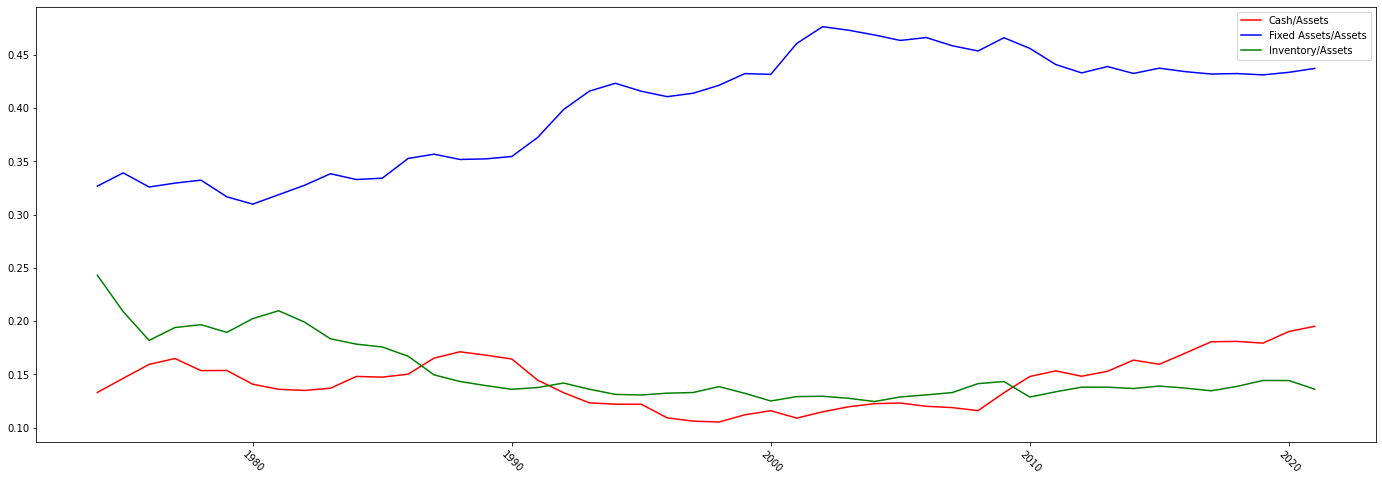

In [36]:
grouped[['Cash/Assets','Fixed Assets/Assets','Inventory/Assets']].plot.line(
     title='', 
     color = ("r","b","g"), xlabel = "", figsize=(24, 8), rot=-45)